# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()['data']['1']['quotes']['USD']['price']
my_btc_value = my_btc * btc_price

eth_price = requests.get(eth_url).json()['data']['1027']['quotes']['USD']['price']
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49083.60
The current value of your 5.3 ETH is $15102.88


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = REST(key_id = alpaca_api_key, secret_key = alpaca_secret_key)

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
#spy_df = api.get_bars("SPY", TimeFrame.Day, "2022-03-18", "2022-03-18", adjustment='raw').df
#spy_df.head()

spy_df = api.get_bars("SPY", TimeFrame.Day, "2018-03-18", "2022-03-18", adjustment='raw').df
spy_df = spy_df.drop(['trade_count', 'vwap'], axis = 1)

agg_df = api.get_bars("AGG", TimeFrame.Day, "2018-03-18", "2022-03-18", adjustment='raw').df
agg_df = agg_df.drop(['trade_count', 'vwap'], axis = 1)


spy_df.columns = pd.MultiIndex.from_product([['SPY'], spy_df.columns])
agg_df.columns = pd.MultiIndex.from_product([['AGG'], agg_df.columns])
master_df = pd.concat([agg_df, spy_df], axis = 1)

master_df.head()


AGG                                      SPY  \
                             open    high     low   close   volume    open   
timestamp                                                                    
2018-03-19 04:00:00+00:00  106.56  106.74  106.53  106.59  2263306  273.34   
2018-03-20 04:00:00+00:00  106.44  106.51  106.40  106.42  3000759  270.91   
2018-03-21 04:00:00+00:00  106.32  106.48  106.08  106.41  2994423  270.88   
2018-03-22 04:00:00+00:00  106.67  106.80  106.49  106.61  3334408  267.83   
2018-03-23 04:00:00+00:00  106.46  106.70  106.46  106.61  3618720  264.17   

                                                                 
                               high     low    close     volume  
timestamp                                                        
2018-03-19 04:00:00+00:00  274.3957  268.62  270.610  109335542  
2018-03-20 04:00:00+00:00  271.6700  270.18  270.930   60267376  
2018-03-21 04:00:00+00:00  273.2700  270.19  270.400   78884438  
2018-03-22 04:00:00+00:00  268.8700  263.36  263.710  149493729  
2018-03-23 04:00:00+00:00  265.0200  257.83  258.015  183856351

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = master_df['AGG']['close'].iloc[-1]
spy_close_price = master_df['SPY']['close'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $108.1
Current SPY closing price: $444.52


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22226.00
The current value of your 200 AGG shares is $21620.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares_value = my_spy_value + my_agg_value
crypto_value = my_btc_value + my_eth_value

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [crypto_value, shares_value], 'type': ['crypto', 'shares']})

df_savings.set_index('type')

# Display savings DataFrame
#display(df_savings)

,amount
type,
crypto,64186.48
shares,43846.00


<AxesSubplot:ylabel='amount'>

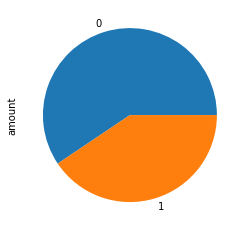

In [12]:
# Plot savings pie chart
df_savings['amount'].plot(kind='pie')

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
net_total = df_savings['amount'].sum()

if (net_total > emergency_fund):
    print('You have enough money in the fund!!')
elif (net_total == emergency_fund):
    print('You chave reached the goal for yourfund!!')
else:
    print(f'You are {emergency_fund - net_total}$ away from reaching your goal')
    
# Validate saving health
# YOUR CODE HERE!

You have enough money in the fund!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

NameError: name 'df_stock_data' is not defined

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")